# Information Retrieval in High Dimensional Data

# Assignment #2, 17.11.2017

# Principal Component Analysis
Group Number: G10

Group Members:
- Achtner Martin
- Arifi Ridon
- Ehrhardt Daniel
- Fichtner Lukas

## Task 1

Let $\mathbf{X} \in \mathbb{R}^{pxN}, p < N$ be a centered matrix of $p$ $N$-dimensional data samples with the full-size SVD $\mathbf{X} = \mathbf{U\Sigma} \mathbf{V}^T$. Assume that the singular values are sorted in a descending manner, i.e. $\sigma_{1,1} \geq \dots \geq \sigma_{p,p}$.

+ Provide a normalized vector $\hat{\mathbf{s}} \in \mathbb{R}^p$, such that

\begin{equation}\hat{\mathbf{s}} = \arg\max\limits_{\mathbf{s} \text{ s.t.} \|\mathbf{s}\|=1}\,\mathbf{s}^T\mathbf{\Sigma\Sigma}^T\mathbf{s}.\end{equation}

$ \rightarrow \mathbf{\Sigma\Sigma^T} = \mathbf{\Lambda}$ is a diagonal matrix with the biggest eigenvalue ${\sigma_{1,1}}^2$ in the upper left corner.
To maximize the equation $\mathbf{s}^T\mathbf{\Sigma\Sigma}^T\mathbf{s}$ we have to weigh the biggest eigenvalue with the maximum weight possible (which in this case is 1), so $\hat{\mathbf{s}}$ has ${\sigma_{1,1}}^2$ as its first entry, and the remaining entries are equal to zero.

$ \rightarrow \hat{\mathbf{s}} = (s_1, s_2\dots,s_p) = (1,0,\dots,0)$

$(s_k = 1$ if $k=1$, else $s_k = 0)$

+ Show that the empirical variance of the inner products of the columns of $\mathbf{X}$ with a normalized vector $\mathbf{a}$,

\begin{equation}\frac{1}{N}\sum\limits_{i=1}^N (\mathbf{a}^T \mathbf{x}_i)^2 = \frac{1}{N}\mathbf{a}^T\mathbf{XX}^T\mathbf{a},\end{equation}

is maximized when $\mathbf{a}$ is set to the first column of $\mathbf{U}$, i.e. $\mathbf{a}=\mathbf{u}_1$ (note that $\|\mathbf{a}\| = 1$).  
Hint: Write $\mathbf{a}$ as a linear combination of the columns of $\mathbf{U}$. Verify that such a representation does not affect the norm constraint.

$\rightarrow$ Let's represent $\mathbf{a}$ as a linear combination:

\begin{equation} \mathbf{a} = a_1 e_1 + a_2 e_2 + \dots + a_p e_p \end{equation}


We denote $e_k$ as the k-th euclidean basis vector. They form an orthonormal basis of $\mathbb{R}^p$.

$\| \mathbf{a}\| = 1$, if the coefficients $a_i$ satisfy the condition:
$\sqrt{a_1^2 + a_2^2 + \dots + a_p^2} = 1$.

We now conduct a change of basis, s.t. $\mathbb{R}^p$ is represented by another set of orthonormal vectors, namely the column vectors of $\mathbf{U}$.

\begin{equation} \mathbf{a} = \alpha_1 u_1 + \alpha_2 u_2 + \dots + \alpha_k u_k  \end{equation}

ist again has length 1 if the coefficients $\alpha_i$ are chosen like this:
\begin{equation}\|\mathbf{a}\| = \sqrt{\alpha_1^2 + \alpha_2^2 + \dots + \alpha_k^2} = 1
\end{equation}

\begin{equation}\mathbf{X} = \mathbf{U \Sigma V}^T \end{equation}

\begin{equation}\mathbf{X}^T = \mathbf{V \Sigma}^T \mathbf{U}^T \end{equation}

\begin{equation}\mathbf{XX}^T = \mathbf{U \Sigma V}^T \mathbf{V \Sigma}^T \mathbf{U}^T \end{equation}

with $\mathbf{V}^T \mathbf{V} = \mathbf{I}$:

\begin{equation}= \mathbf{U \Sigma \Sigma}^T \mathbf{U}^T \end{equation}

\begin{equation}= \mathbf{U \Lambda U}^T \end{equation}

\begin{equation}\frac{1}{N}\sum\limits_{i=1}^N (\mathbf{a}^T \mathbf{x}_i)^2 = \frac{1}{N}\mathbf{a}^T\mathbf{(U \cdot \Lambda \cdot U^T)}^T\mathbf{a},\end{equation}

If we denote the products $\mathbf{a}^T \mathbf{U} = \mathbf{s}^T$ and $\mathbf{U}^T \mathbf{a} = \mathbf{s}$ as vectors, we can reduce the problem to the problem of the task before, which has been already solved.

In order to get a 1 as the first entry of $\mathbf{s}$, $\mathbf{a}$ has to be set to $\mathbf{u}_1$ (the first column vector of $\mathbf{U}$), because $\mathbf{U}$ is a orthonormal matrix.

Hence $\mathbf{u}_i^T \mathbf{u}_j = 1$, if $i = j$ and 0 else.


## Task 2

For this task download the modified version of the <i>Yale Face Database B</i> provided on Moodle (task2_data.zip). The Yale Face Database B consists of single light source images of 10 subjects, each seen in different poses and illumination conditions. In the provided form the database is divided into 5 subsets. In subset 0 the subject is illuminated by an almost frontal light source, while for the subset 1-4 the light source is gradually moved along the horizon. Subset 0 will serve as training set, while subsets 1-4 are used for testing.

+ Write a function that takes as an input matrix $\mathbf{T}$ of vectorized images from subset 0. The ouput of this function are the 20 first singular vectors $\mathbf{U}[:, 1],\dots,\mathbf{U}[:, 20]$. Display the first 3 vectors as images, i.e., reshape them to size 50 x 50 and display them.

In [32]:
# Import libs
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os

In [33]:
# Check for number and size of images
path = 'yaleBfaces/subset0/'
filenames = sorted((fn for fn in os.listdir(path) if fn.endswith('.png')))
im0 = imageio.imread(path + filenames[0])
print('Number of image files in subset 0: {}'.format(len(filenames)))
print('Size of a picture: {}'.format(im0.shape))

Number of image files in subset 0: 70
Size of a picture: (50, 50)


In [34]:
# Create Matrix T
T = np.zeros((2500, 70))
for idx, fn in enumerate(filenames):
    im = imageio.imread(path + fn)
    T[:, idx] = np.reshape(im, 2500)

In [35]:
# Center Matrix T
mu = np.mean(T, axis=1)
mu = np.expand_dims(mu, axis=1)
T = T - mu

In [36]:
# Function that returns 20 vectors of Matrix U of SVD of T
def get_singular_vectors(T):
    U, s, V = np.linalg.svd(T, compute_uv=True)
    return U[:, :20]

In [37]:
# Compute SVD of T
singular_vectors = get_singular_vectors(T)

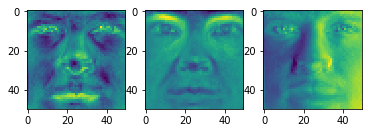

In [38]:
# Display the first three singular vectors as images
u0 = np.reshape(singular_vectors[:, 0], (50, 50))
u1 = np.reshape(singular_vectors[:, 1], (50, 50))
u2 = np.reshape(singular_vectors[:, 2], (50, 50))

ax1 = plt.subplot(131)
plt.imshow(u0)
ax2 = plt.subplot(132)
plt.imshow(u1)
ax3 = plt.subplot(133)
plt.imshow(u2)
plt.show()

+ Write a function that takes as an input the training set $\mathbf{T}$ composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the $i$-th sample belongs to class $j$, the $i$-th entry of the label vector is $j$. In this exercise $j$ is an integer between 1 and 10), the test samples $S$ (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the first step, and the parameter $k$ that denotes how many of the PCs are used. Use the euclidian distance to classify each sample image based on its three nearest neighbors. (This is done by comparing the test samples with the training samples in the reduced space.) As an output give the fraction of images from $S$ that were misclassified, i.e., the error rate. Repeat this for subsets 1 through 4 and for $k= 1,\dots,20$. Plot the error rate for each subset.

In [39]:
def missclassified(T, training_labels, S, test_labels, singular_vectors, k):
    # Transform data via Transformation matrix U_k
    reduced_training_data = np.dot(singular_vectors[:, :k].T, T)
    reduced_test_data = np.dot(singular_vectors[:, :k].T, S)
    
    assigned_labels = np.zeros(len(test_labels))
    for i in range(len(test_labels)):
        testset = reduced_test_data[:, i]
        euclidian_distances = np.zeros(len(training_labels))
        for j in range(len(training_labels)):
            trainingset = reduced_training_data[:, j]
            # Save euclidian distances to every other image
            euclidian_distances[j] = np.linalg.norm(trainingset-testset)
        # Get indices of nearest neighbours
        nearest_indices = np.argsort(euclidian_distances)[:3]
        #print(nearest_indices)
        nearest_labels = np.array(training_labels[nearest_indices], dtype='int64')
        counts = np.bincount(nearest_labels)
        #print(counts)
        #print(test_labels[i], np.argsort(counts)[-1])
        assigned_labels[i] = np.argsort(counts)[-1]
        equals = assigned_labels != test_labels
    return np.sum(equals)/len(test_labels)

In [40]:
# Assign training set labels
path = 'yaleBfaces/subset0/'
filenames = sorted((fn for fn in os.listdir(path) if fn.endswith('.png')))
training_labels = np.zeros(len(filenames), dtype='int64')

for idx, fn in enumerate(filenames):
    training_labels[idx] = int(fn[6:8])
#training_labels

In [41]:
# Read image set and compute error rates
error_rates = np.zeros((4, 20))
for i in range(1, 5):
    path = 'yaleBfaces/subset{}/'.format(i)
    filenames = sorted((fn for fn in os.listdir(path) if fn.endswith('.png')))
    test_labels = np.zeros(len(filenames), dtype='int64')
    S = np.zeros((2500, len(filenames)))
    for idx, fn in enumerate(filenames):
        test_labels[idx] = int(fn[6:8])
        im = imageio.imread(path + fn)
        S[:, idx] = np.reshape(im, 2500)
    # Center test matrix S with mu from before
    S = S - mu
    for k in range(1, 21):    
        error_rates[i-1, k-1] = missclassified(T, training_labels, S, test_labels , singular_vectors, k)

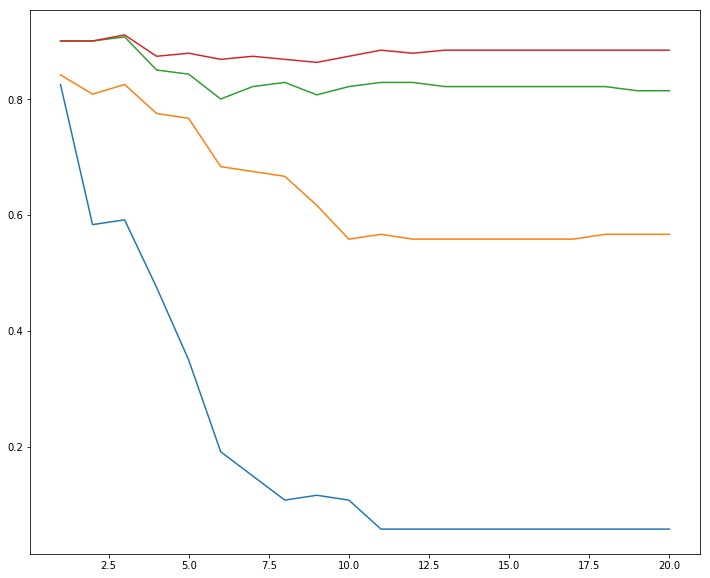

In [42]:
fig = plt.figure(figsize=(12, 10))
for i in range(4):
    plt.plot(range(1, 21),error_rates[i, :])

#plt.legend(('Subset1', 'Subset2', 'Subset3', 'Subset4'))
plt.show()

+ Repeat the above experiment without using the first three singualr vectors, i.e., use $k = 1,\dots,17$ singular vectors starting from the 4-th. Plot the error rate as before. How do you explain the difference in recognition rate?

In [43]:
# Read image set and compute error rates
error_rates = np.zeros((4, 17))
for i in range(1, 5):
    path = 'yaleBfaces/subset{}/'.format(i)
    filenames = sorted((fn for fn in os.listdir(path) if fn.endswith('.png')))
    test_labels = np.zeros(len(filenames), dtype='int64')
    S = np.zeros((2500, len(filenames)))
    for idx, fn in enumerate(filenames):
        test_labels[idx] = int(fn[6:8])
        im = imageio.imread(path + fn)
        S[:, idx] = np.reshape(im, 2500)
    # Center test matrix S with mu from before
    S = S - mu
    for k in range(1, 18):    
        error_rates[i-1, k-1] = missclassified(T, training_labels, S, test_labels , singular_vectors[:, 3:20], k)

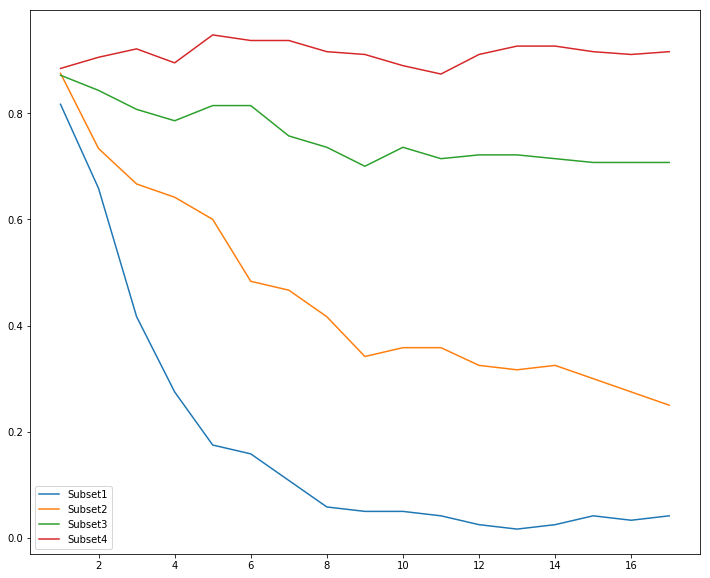

In [44]:
fig = plt.figure(figsize=(12, 10))
for i in range(4):
    plt.plot(range(1, 18),error_rates[i, :])

plt.legend(('Subset1', 'Subset2', 'Subset3', 'Subset4'))
plt.show()

$\rightarrow$ The recognition rate is much better now because the first singular vectors correspond to the differences in the lighting conditions (which we want to ignore) and not in the differences of the peoples' faces we are interested in.